In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
# 添加缺失的vwap字段（如果未提供）
if 'vwap' not in df.columns:
    df['vwap'] = df['turnover'] / df['volume']

In [4]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [5]:
def rsv_factor(df, n=10):
    """
    计算RSV因子（相对强弱值）
    公式：(close - Min(low, n)) / (Max(high, n) - Min(low, n) + 1e-12)
    
    参数:
    df: 包含OHLCV数据的DataFrame
    n: 滚动窗口大小 (默认10)
    """
    # 计算滚动窗口内的最高价和最低价
    high_max = df['high'].rolling(n).max()
    low_min = df['low'].rolling(n).min()
    
    # 计算价格范围并避免除零错误
    price_range = high_max - low_min + 1e-12
    
    # 计算RSV因子
    rsv = (df['close'] - low_min) / price_range
    
    return rsv

# 因子测试

In [6]:
evaluator.set_factor(
    factor_data_or_func=rsv_factor,
    factor_name='rsv_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.009725
   Rank_IC (Spearman): -0.021308
📊 信息比率:
   IR: -0.404236
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130736
   因子列: rsv_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


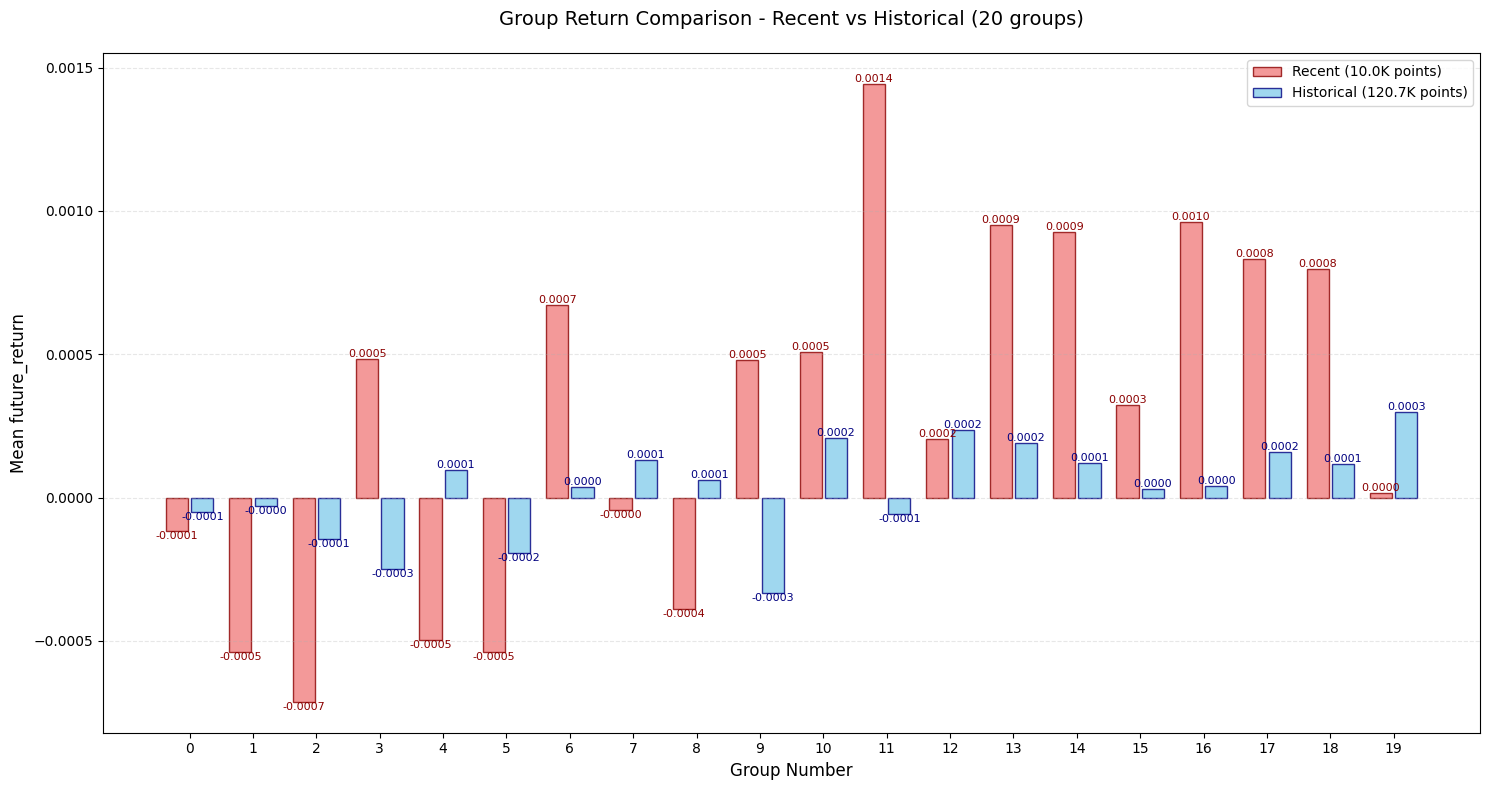

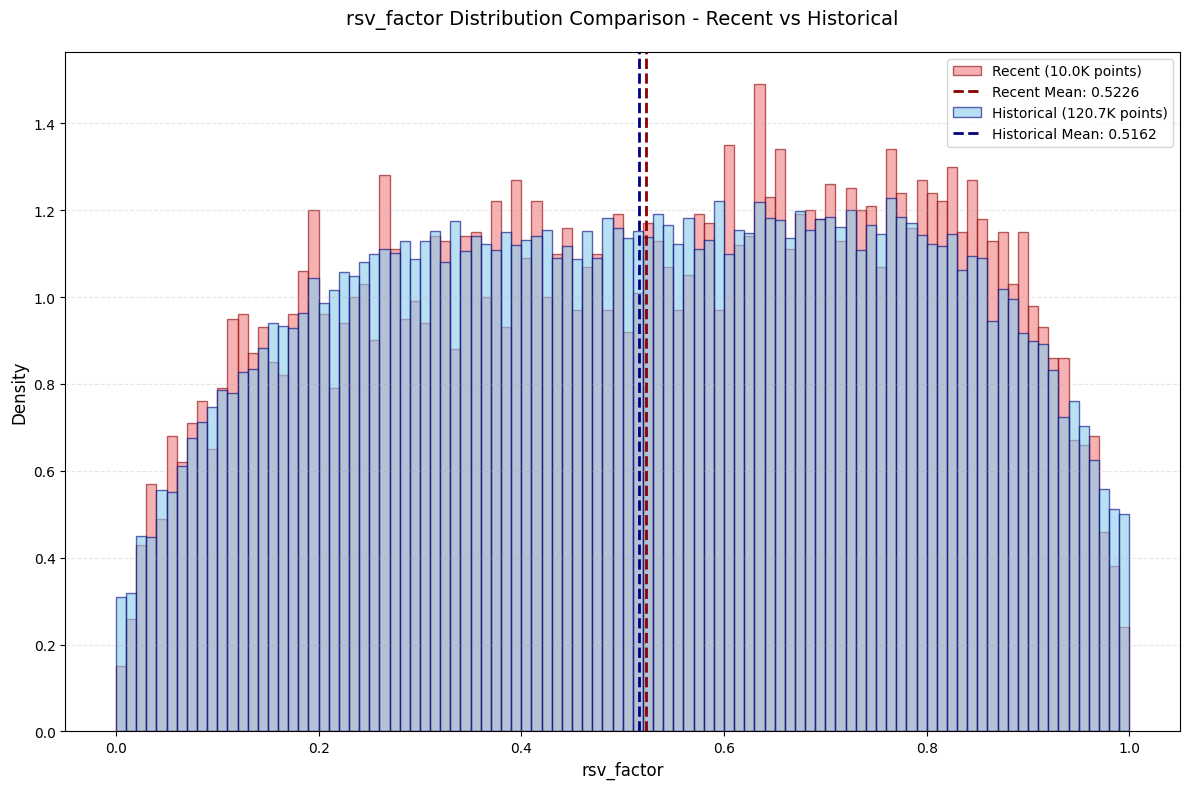

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)